## INA219  
The INA219 is a current shunt and power monitor with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904

In [1]:
import matplotlib.pyplot as plt

from meerkat.ina219 import INA219
from meerkat import base, parser, tools

In [2]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1, bus_addr=0x40, output='csv')

In [3]:
dev.verbose = True

#### Configuration

In [4]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
HEX value: 0xb99f
Binary value:
1011100110011111
1111110000000000
5432109876543210


#### Measurement

For this example, device is connected to a Raspberry Pi 3 5V supply.

In [5]:
dev.get_shunt_voltage()

0.00348

In [6]:
dev.get_bus_voltage()

0.58

In [7]:
dev.get_current_simple()

0.0349

#### Calibration

Calibration Register enables the user to scale the Current Register and Power Register to the most useful value for a given application.  Refer to the datasheet for details

In [8]:
dev.set_calibration(10240)
base.time.sleep(0.1)

Writing to 'calibration' registry # 5
HEX value: 0x2800
Binary value:
0010100000000000
1111110000000000
5432109876543210


In [9]:
# confirm calibration value
dev.get_calibration()

10240

In [10]:
dev.get_shunt_voltage()

0.00348

In [11]:
dev.get_bus_voltage()

1.02

In [12]:
# simple return, just float
dev.get_current_simple()

0.0348

In [13]:
# get method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 0.544, 0.034699999999999995],
 ['test_1', 2, 1.112, 0.034699999999999995],
 ['test_1', 3, 1.008, 0.034699999999999995],
 ['test_1', 4, 0.808, 0.034699999999999995],
 ['test_1', 5, 0.324, 0.034699999999999995]]

#### JSON Data Publishing

In [14]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [15]:
# writing method with description and sample number
dev.publish(description='test_2', n=5)

['{"description": "test_2", "sample_n": 0, "voltage": 0.04, "current": 0.034999999999999996, "std_time_ms": "2020-01-26 17:44:11.752715"}',
 '{"description": "test_2", "sample_n": 1, "voltage": 0.976, "current": 0.0348, "std_time_ms": "2020-01-26 17:44:11.756145"}',
 '{"description": null, "sample_n": 2, "voltage": 0.484, "current": 0.034699999999999995, "std_time_ms": "2020-01-26 17:44:11.759538", "name": "INA219", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "INA219", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "12bit", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfccab0>", "state": null, "active": null, "error": null, "dtype": null, "description": "Texas Instruments Bidirectional Current Mo

#### JSON Writer Output

In [16]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [17]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [18]:
dev.json_writer.path

'2020_01_26_17_44_13.jsontxt'

In [19]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "voltage": 0.848, "current": 0.0348, "std_time_ms": "2020-01-26 17:44:13.382129"}
{"description": "test_3", "sample_n": 1, "voltage": 0.056, "current": 0.0349, "std_time_ms": "2020-01-26 17:44:13.385415"}
{"description": null, "sample_n": 2, "voltage": 0.792, "current": 0.0349, "std_time_ms": "2020-01-26 17:44:13.400420", "name": "INA219", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_01_26_17_44_13.jsontxt", "device": {"name": "INA219", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "12bit", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfccab0>", "state": null, "active": null, "error": null, "dtype": null, "description": "Texas Instruments Bidirectional Current Monitor", "urls": 

#### CSV Writer Output

In [20]:
# switch back to CSV format
dev.writer_output = 'csv'

In [21]:
# writer method with description and sample number
dev.write(description='test_4', n=30)

In [22]:
dev.csv_writer.path

'2020_01_26_17_44_13_data.csv'

In [23]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in CSV

In [24]:
m

{'name': 'INA219',
 'title': None,
 'description': None,
 'format': None,
 'encoding': 'utf-8',
 'bytes': None,
 'hash': None,
 'schema': None,
 'sources': None,
 'licenses': None,
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'skip_lines': 1,
 'path': '2020_01_26_17_44_13_data.csv',
 'device': {'name': 'INA219',
  'version_hw': '1.0',
  'version_sw': '1.0',
  'accuracy': None,
  'precision': '12bit',
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0xacfccab0>',
  'state': None,
  'active': None,
  'error': None,
  'dtype': None,
  'description': 'Texas Instruments Bidirectional Current Monitor',
  'urls': 'www.ti.com/product/ADS1115',
  'manufacturer': 'Texas Instruments',
  'calibration_date': None,
  'bus_voltage_range': 32,
  'gain': 8,
  'gain_string': '+/- 320 mV',
  'bus_adc_resolution': 12,
  'bus_adc_averaging': None,
  'shunt_adc_resolution': 12,
  'shunt_adc_averaging': None,
  'mode': 7,
  'm

#### Parsed CSV data

In [25]:
df.head()

,std_time_ms,description,sample_n,voltage,current,datetime64_ns
0,2020-01-26 17:44:13.679595,test_4,0,0.864,0.0347,2020-01-26 17:44:13.679595
1,2020-01-26 17:44:13.683146,test_4,1,0.840,0.0348,2020-01-26 17:44:13.683146
2,2020-01-26 17:44:13.686729,test_4,2,0.052,0.0347,2020-01-26 17:44:13.686729
3,2020-01-26 17:44:13.697346,test_4,3,1.108,0.0349,2020-01-26 17:44:13.697346
4,2020-01-26 17:44:13.701509,test_4,4,0.800,0.0349,2020-01-26 17:44:13.701509


In [26]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

In [43]:
def plot_2ax(df, x, y0, y1):
    fig0, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.plot(df[x], df[y0], label=y0, color="orange", marker="x")
    ax0.plot([df[x].min(), df[x].max()],
             [df[y0].mean(), df[y0].mean()], color="orange",
             linestyle=":")
    ax1.plot(df[x], df[y1], label=y1, color="green", marker="+")
    ax1.plot([df[x].min(), df[x].max()],
             [df[y1].mean(), df[y1].mean()], color="green",
             linestyle=":")
    ax0.set_ylabel(y0)
    ax1.set_ylabel(y1)
    
    plt.show()
    plt.close()

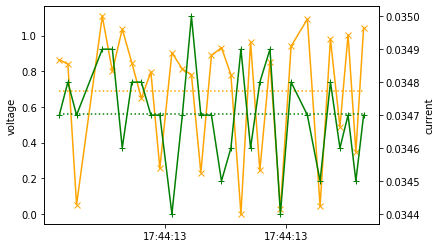

In [44]:
plot_2ax(df=df, x="datetime64_ns", y0="voltage", y1="current")

In [45]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 238.7680 Hz
